# Classification

In this lab, we will use different **classification** methods: 

> [$SVM$](https://scikit-learn.org/stable/modules/svm.html)

> [$kNN$](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)

> [$Random Forest$](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

For each method, we will select *hyperparamters*, obtain *scores* and perform differents tests (like the computation time)

In [1]:
from IPython.core.display import Image, display

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

In [3]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
import pandas as pd

In [4]:
def load_spam():
  data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',header=None)
  data.columns=["wf_make",         
"wf_address",      
"wf_all",          
"wf_3d",           
"wf_our",          
"wf_over",         
"wf_remove",       
"wf_internet",     
"wf_order",        
"wf_mail",         
"wf_receive",      
"wf_will",         
"wf_people",       
"wf_report",       
"wf_addresses",    
"wf_free",         
"wf_business",     
"wf_email",        
"wf_you",          
"wf_credit",       
"wf_your",         
"wf_font",         
"wf_000",          
"wf_money",        
"wf_hp",           
"wf_hpl",          
"wf_george",       
"wf_650",          
"wf_lab",          
"wf_labs",         
"wf_telnet",       
"wf_857",          
"wf_data",         
"wf_415",          
"wf_85",           
"wf_technology",   
"wf_1999",         
"wf_parts",        
"wf_pm",           
"wf_direct",       
"wf_cs",           
"wf_meeting",      
"wf_original",     
"wf_project",      
"wf_re",           
"wf_edu",          
"wf_table",        
"wf_conference",   
"cf_;",            
"cf_(",            
"cf_[",            
"cf_!",            
"cf_$",            
"cf_#",            
"cap_average", 
"cap_longest", 
"cap_total",
"target"]
  return data

# Spam filter data set

The data we will be using can be found here: [Spam filtering](https://archive.ics.uci.edu/ml/datasets/spambase). In this lab, we will classify an income mail as spam or desired based on different factors. The variables in the dataset include the following:

  - 48 continuous real variables in $[0,100]$ *word_freq_WORD*: frequency of word *WORD* in the email (in percentage)
  - 6 continuous real variables in $[0,100]$ *char_freq_CHAR*: frequency of character *CHAR* in the email (in percentage)
  - 1 continuous real variable: average length of the sequences of uninterrupted capital letters 
  - 1 continuous real variable: length of the longest  sequence of uninterrupted capital letters 
  - 1 continuous real variable: total count of capital letters in the email

In [5]:
data = load_spam()
print("Loaded {0:d} observations with {1:d} columns\n".format(len(data), len(data.columns)))
X = data[data.columns[:57]].values
Y = data['target'].values
print("{0:d} observations with {1:d} columns".format(X.shape[0], X.shape[1]))
print("{0:d} targets".format(len(Y)))
print("Values of the targets:")
print(np.unique(Y))

Loaded 4601 observations with 58 columns

4601 observations with 57 columns
4601 targets
Values of the targets:
[0 1]


## Training and test set

We will create a partition of the data: 70% will be the **train** and the rest is the **test**.

In [6]:


import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

x_train_original = x_train
y_train_original = y_train
x_test_original = x_test
y_test_original = y_test



## Estimation of hyperparameters with grid search

We will use a **grid search** with **cross validation** to find the best values of the *hyperparameters*.

We will form a **grid** with a number of dimensions equal to the number of hyperparameters that need to be optimized. Afterwards, we will use **cross validation** to simulate the effect of training a model with a set of data and evaluate its generalization capabilities as the performance in a **separate dataset**. 

The cross validation process consists of randomly partitioning the training dataset in disjoint subsets of similar sizes (each set called a **fold**). For each fold, an instance of the model is created with the corresponding hypterparameters, we will have $N$ scores, corresponding to the evaluation of the model fitted in each iteration. 




**We will use the  training data partition exclusively. We will use *StandardScaler* to normalize the data.**

In [16]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors' : [1,3,5,7,10,15,20,50,100,200,500],
    'weights' : ['distance', 'uniform']
}

gridKNN = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5);
gridKNN_results = gridKNN.fit(x_train, y_train);
bestKNN = gridKNN_results.best_params_;
print("KNN: ", bestKNN)


from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators' : [10,20,50,100,200,500,1000],
    'max_leaf_nodes' : [5,10,20,50]
}

gridRF = GridSearchCV(RandomForestClassifier(), rf_params, cv = 5)
gridRF_results = gridRF.fit(x_train, y_train)
bestRF = gridRF_results.best_params_
print("Random Forest: ", bestRF)

KNN:  {'n_neighbors': 10, 'weights': 'distance'}
Random Forest:  {'max_leaf_nodes': 50, 'n_estimators': 1000}


## Other relevant measures besides the accuracy

Besides the classification accuracy there are other relevant measures that can help you decide for a machine learning method or another. These metrics include the **time needed to train the method** and the **time needed to evaluate a test set** with an already trained method.


We will use the **best parameters** obtained before and test how long they take in order to help find the best hyperparameters.

In [17]:
from sklearn.model_selection import cross_validate

cv_knn = cross_validate(KNeighborsClassifier(n_neighbors=10, weights='distance'), x_train, y_train, cv = 5)
print("KNN: ", cv_knn)

cv_rf = cross_validate(RandomForestClassifier(max_leaf_nodes=50, n_estimators=500), x_train, y_train, cv = 5)
print('\nRandom Forest: ', cv_rf)


KNN:  {'fit_time': array([0.01698828, 0.02198577, 0.01898909, 0.02198386, 0.01499081]), 'score_time': array([0.24584723, 0.25284362, 0.23285484, 0.22686028, 0.24484825]), 'test_score': array([0.91317829, 0.92236025, 0.89285714, 0.93944099, 0.91135303])}

Random Forest:  {'fit_time': array([2.70385671, 2.37469006, 2.09570169, 1.97728395, 1.97977066]), 'score_time': array([0.10893202, 0.10593271, 0.08894539, 0.09194255, 0.09394217]), 'test_score': array([0.93488372, 0.94254658, 0.93012422, 0.94565217, 0.94245723])}


# SVM initial guess for the hyperparameters

We will guess the value of each hyperparameter


In [19]:
from sklearn.svm import SVC

param_grid = {
    'C' : [0.1,1,10,100,1000],
    'gamma' : [0.1,1,10]
}

grid = GridSearchCV(SVC(),param_grid, cv = 5)
grid_results = grid.fit(x_train, y_train)
best = grid_results.best_params_
print(best)


{'C': 10, 'gamma': 0.1}


# Dependence of the SVC performance with $\gamma$

In the following cells, we will get some insights on the role of each parameter in the performance of the SVM. We will analyze the spread of the kernel. Later, we will plot the **cross validation** error for a wide range of values of the kernel. We will standarize the data.


[0.07701678 0.07577455 0.07608511 0.07577406 0.07453231 0.07484287
 0.07422223 0.07391215 0.07360063 0.07266943 0.07266799 0.07235743
 0.07173583 0.07173534 0.07049166 0.0701811  0.0708027  0.07018206
 0.07018254 0.07049311 0.07018255 0.0698715  0.06956191 0.06925087
 0.06925087 0.07018351 0.06987295 0.06956288 0.0692528  0.06956336
 0.0692528  0.07080463 0.07018351 0.06956191 0.06925183 0.06987247
 0.07018303 0.06987151 0.06987151 0.07049263 0.07018206 0.07080318
 0.07111374 0.07235598 0.0714243  0.0714243  0.07111374 0.06956047
 0.07049311 0.07111422]


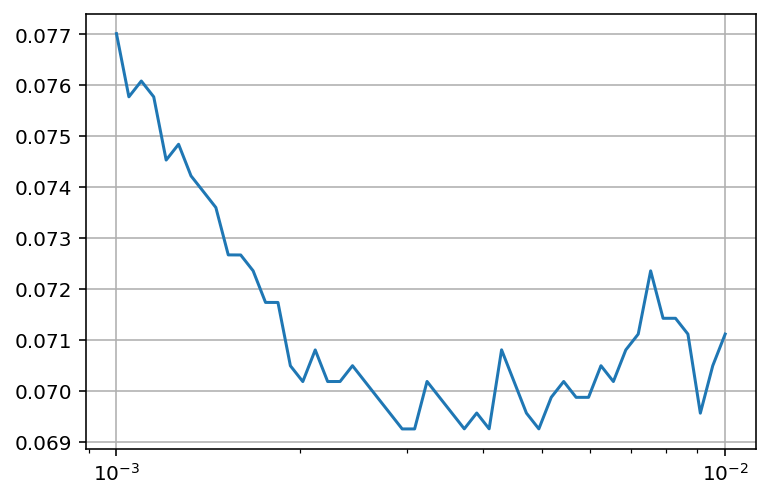

In [21]:

gamma = np.logspace(-3, -2, 50, endpoint=True)
cve = np.empty(gamma.shape[0])
counter = 0

for i in gamma:
    results = cross_validate(SVC(C= 10,gamma = i),x_train ,y_train, cv = 5)
    cve[counter] = 1-(sum(results['test_score'])/len(results['test_score']))
    counter += 1

print(cve)
    
plt.figure()
plt.plot(gamma, cve, label='Cross validation error vs.  𝛾')
plt.grid()
plt.xscale('log')


The value of $\gamma$ in a RBF kernel indicates how large is the local influence of each support vector. That is, the classification of each observation is more dependent on the closer Support Vectors. 


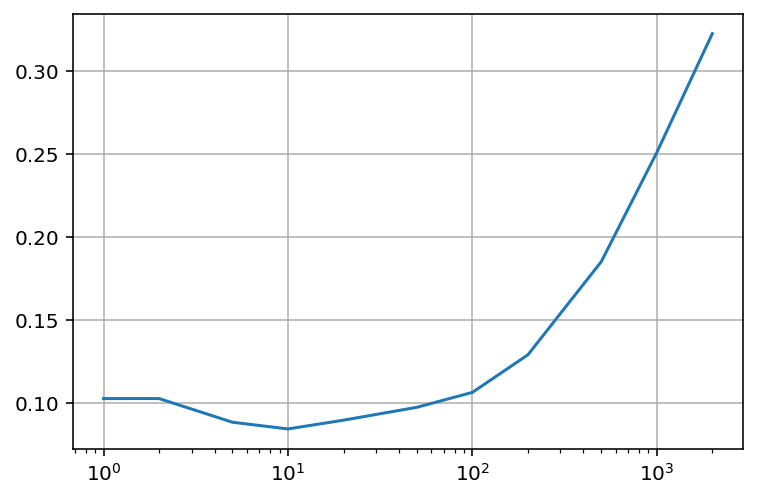

In [25]:

# here we see a kNN classifier with votes weighted by distance.

k = [1, 2, 5, 10, 20,50, 100, 200, 500, 1000, 2000]
cve = np.empty(len(k))


plt.figure()
plt.plot(k, cve, label='Cross validation error vs.  k')
plt.grid()
plt.xscale('log')


# Dependence of the SVC performance with $C$


Using the best value we found before, we will find the best value for the $C$ parameter


[0.09503115 0.09503163 0.09472107 0.09534268 0.09565323 0.09658539
 0.09720603 0.09782667 0.09844779 0.09844779 0.09782667 0.09751611
 0.09751707 0.09689595 0.09751707 0.09689643 0.09689547 0.09689499
 0.09751707 0.09751707 0.09720555 0.09689499 0.09720651 0.09907035
 0.0990718  0.09876172 0.09969388 0.09907276 0.09845116 0.09845116
 0.09845068 0.09814012 0.09907228 0.09938332 0.09938284 0.09938284
 0.09907228 0.09907179 0.09938187 0.09969243 0.09969243 0.09969243
 0.09938235 0.09938235 0.09876123 0.09938235 0.09969291 0.09969291
 0.09938139 0.09938139]


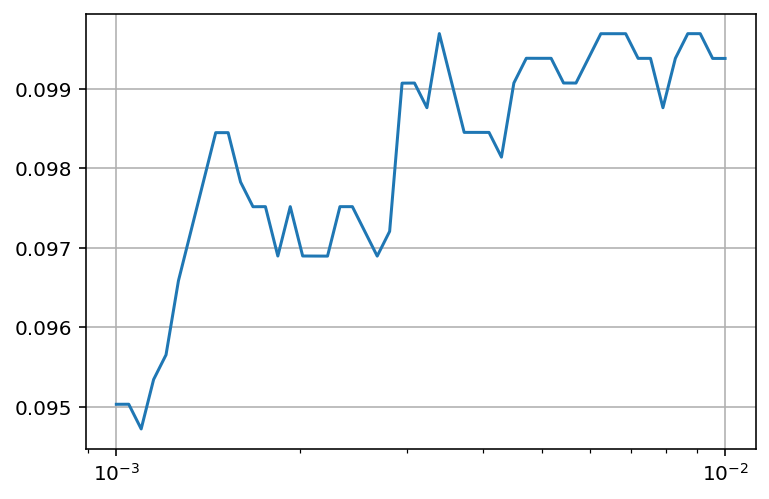

In [27]:

C = np.logspace(1, 2, 50, endpoint=True)
cve = np.empty(C.shape[0])

for counter, value in enumerate(C):
    results = cross_validate(SVC(C= value, gamma = 0.1),x_train ,y_train, cv = 5)
    cve[counter] = 1-np.mean(results['test_score'])

print(cve)
    
plt.figure()
plt.plot(gamma, cve, label='Cross validation error vs.  C')
plt.grid()
plt.xscale('log')


# Final model with SVC

## Finer grid search for finding the final set of hyperparameters

Once we have good results, we will go another **grid search** to obtain yet other $C$ and $\gamma$

In [28]:

C = np.logspace(1, 2, 20, endpoint=True)
gamma = np.logspace(-3, -2, 20, endpoint=True)

params = {
    'C' : C,
    'gamma' : gamma
}

grid = GridSearchCV(SVC(),params, cv = 5)
grid_results = grid.fit(x_train, y_train)
best = grid_results.best_params_
print(best)



{'C': 100.0, 'gamma': 0.0026366508987303583}


## Execution times with the best hyperparameters

Here, we will use the best hyperparamters and obtain the fitting and testing time for all values.

In [29]:


best_C = 100.0
best_gamma = 0.002976351441631319

# SVM
cv_svm = cross_validate(SVC(gamma = best_gamma, C=best_C), x_train, y_train, cv = 5)
print('SVM time results:', cv_svm)
print('test_score:', np.mean(cv_svm['test_score']))
print('fit_time:', np.mean(cv_svm['fit_time']))
print('score_time:', np.mean(cv_svm['score_time']))

# KNN
print('\nKNN time results:', cv_knn)
print('test_score:', np.mean(cv_knn['test_score']))
print('fit_time:', np.mean(cv_knn['fit_time']))
print('score_time:', np.mean(cv_knn['score_time']))

# Random Forest
print('\nRandom Forest time results:', cv_rf)
print('test_score:', np.mean(cv_rf['test_score']))
print('fit_time:', np.mean(cv_rf['fit_time']))
print('score_time:', np.mean(cv_rf['score_time']))



SVM time results: {'fit_time': array([0.23985124, 0.25983834, 0.23685503, 0.27882957, 0.27982497]), 'score_time': array([0.02898073, 0.03098083, 0.03097963, 0.03797412, 0.03198266]), 'test_score': array([0.9255814 , 0.9378882 , 0.92857143, 0.94565217, 0.93157076])}
test_score: 0.93385279172879
fit_time: 0.25903983116149903
score_time: 0.03217959403991699

KNN time results: {'fit_time': array([0.01698828, 0.02198577, 0.01898909, 0.02198386, 0.01499081]), 'score_time': array([0.24584723, 0.25284362, 0.23285484, 0.22686028, 0.24484825]), 'test_score': array([0.91317829, 0.92236025, 0.89285714, 0.93944099, 0.91135303])}
test_score: 0.9158379424652441
fit_time: 0.018987560272216798
score_time: 0.24065084457397462

Random Forest time results: {'fit_time': array([2.70385671, 2.37469006, 2.09570169, 1.97728395, 1.97977066]), 'score_time': array([0.10893202, 0.10593271, 0.08894539, 0.09194255, 0.09394217]), 'test_score': array([0.93488372, 0.94254658, 0.93012422, 0.94565217, 0.94245723])}
test_

In [30]:
print('test_score improvement:')
test_score_series1 = pd.Series([np.mean(cv_svm['test_score']), np.mean(cv_knn['test_score'])])
test_score_series2 = pd.Series([np.mean(cv_svm['test_score']), np.mean(cv_rf['test_score'])])

print('SVM vs KNN\n', test_score_series1.pct_change())
print('\nSVM vs RF\n', test_score_series2.pct_change())


print('\nfit_time improvement:')
fit_time_series1 = pd.Series([np.mean(cv_knn['fit_time']), np.mean(cv_svm['fit_time'])])
fit_time_series2 = pd.Series([np.mean(cv_knn['fit_time']), np.mean(cv_rf['fit_time'])])

print('KNN vs SVM\n', fit_time_series1.pct_change())
print('\nKNN vs RF\n', fit_time_series2.pct_change())


print('\nscore_time improvement:')
score_time_series1 = pd.Series([np.mean(cv_rf['score_time']), np.mean(cv_svm['score_time'])])
score_time_series2 = pd.Series([np.mean(cv_rf['score_time']), np.mean(cv_knn['score_time'])])

print('RF vs SVM\n', score_time_series1.pct_change())
print('\nRF vs KNN\n', score_time_series2.pct_change())

test_score improvement:
SVM vs KNN
 0         NaN
1   -0.019291
dtype: float64

SVM vs RF
 0         NaN
1    0.005654
dtype: float64

fit_time improvement:
KNN vs SVM
 0          NaN
1    12.642607
dtype: float64

KNN vs RF
 0           NaN
1    116.248376
dtype: float64

score_time improvement:
RF vs SVM
 0         NaN
1   -0.671432
dtype: float64

RF vs KNN
 0         NaN
1    1.457151
dtype: float64


# Use of the test set 

We will now use a *kNN* classifier using the best parameters. We will create a pipeline and call the `score` method with the **test set**. We will do the same with *SVM* and *RF*

In [37]:
    

from sklearn.pipeline import Pipeline

print('KNN')
#1.
knn = KNeighborsClassifier(n_neighbors=10, weights='distance') # instantiate object
knn.fit(x_train, y_train) # train
predicted_y_test = knn.predict(x_test) # predict
acc_train_set = knn.score(x_train, y_train) # evaluate 
acc_test_set = knn.score(x_test, y_test) # evaluate
print("Accuracy in the training set: {0:.2f}%".format(acc_train_set*100.))
print("Accuracy in the test set: {0:.2f}%".format(acc_test_set*100.))

#2.
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('kNN', KNeighborsClassifier(n_neighbors=10, weights='distance'))])

#3.
pipe.fit(x_train_original, y_train_original)

#4.
train_risk = pipe.score(x_train_original, y_train_original)
test_risk = pipe.score(x_test_original, y_test_original)
print("\nR^2 in the training set after scaling: {0:.2f}".format(train_risk))
print("R^2 in the test set after scaling: {0:.2f}".format(test_risk))



KNN
Accuracy in the training set: 99.97%
Accuracy in the test set: 92.03%

R^2 in the training set after scaling: 1.00
R^2 in the test set after scaling: 0.92


In [38]:
print('Random Forest')
#1.
rf = RandomForestClassifier(max_leaf_nodes=50, n_estimators=1000) # instantiate object
rf.fit(x_train, y_train) # train
predicted_y_test = rf.predict(x_test) # predict
acc_train_set = rf.score(x_train, y_train) # evaluate 
acc_test_set = rf.score(x_test, y_test) # evaluate
print("Accuracy in the training set: {0:.2f}%".format(acc_train_set*100.))
print("Accuracy in the test set: {0:.2f}%".format(acc_test_set*100.))

#2.
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('RandomForest', RandomForestClassifier(max_leaf_nodes=50, n_estimators=1000))])

#3.
pipe.fit(x_train, y_train)

#4.
train_risk = pipe.score(x_train, y_train)
test_risk = pipe.score(x_test, y_test)
print("\nR^2 in the training set after scaling: {0:.2f}".format(train_risk))
print("R^2 in the test set after scaling: {0:.2f}".format(test_risk))


Random Forest
Accuracy in the training set: 95.25%
Accuracy in the test set: 93.70%

R^2 in the training set after scaling: 0.95
R^2 in the test set after scaling: 0.94


In [39]:
print('SVC')
#1.
svc = SVC(gamma = best_gamma, C=best_C) # instantiate object
svc.fit(x_train, y_train) # train
predicted_y_test = svc.predict(x_test) # predict
acc_train_set = svc.score(x_train, y_train) # evaluate 
acc_test_set = svc.score(x_test, y_test) # evaluate
print("Accuracy in the training set: {0:.2f}%".format(acc_train_set*100.))
print("Accuracy in the test set: {0:.2f}%".format(acc_test_set*100.))

#2.
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('RandomForest', SVC(gamma = best_gamma, C=best_C))])

#3.
pipe.fit(x_train, y_train)

#4.
train_risk = pipe.score(x_train, y_train)
test_risk = pipe.score(x_test, y_test)
print("\nR^2 in the training set after scaling: {0:.2f}".format(train_risk))
print("R^2 in the test set after scaling: {0:.2f}".format(test_risk))
    
    

SVC
Accuracy in the training set: 95.59%
Accuracy in the test set: 94.50%

R^2 in the training set after scaling: 0.96
R^2 in the test set after scaling: 0.94


## Alternative measures of performance: Precision and Recall 

The spam email detection is a probem in which the misclassifications bear different consequences depending on the true class of the observation:


In a general binary classification problem each class receives a name: 
- positive: the class you want to detect. The observations in this class show a common pattern.
- negative: the class formed by the other observations that do not show that pattern.

Once each class is casted onto positive and negative, the outcome of a classifier trained to separate these two classes can be grouped into these 4 categories:
- **true positive** observations whose true class is the positive one and are correctly classified
- **true negative** observations whose true class is the negative one and are correctly classified
- **false positive** observations whose true class is the negative one and are incorrectly classified (the classifiers says they are positive, thus false positive)
- **false negative** observations whose true class is the positive one and are incorrectly classified (the classifiers says they are negative, thus false negative)


We will use [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall) as alternative methods to find the best model.



## Using the best *hyperparameters* in our models.

We will decide the $spam$ to play the role of $-1$ and the $+1$ to correspond to $not spam$

The best hyperparameters for $SVM$ are {'C': 10, 'gamma': 0.1}

The best hyperparameters for $kNN$ are {'n_neighbors': 10, 'weights': 'distance'}

The best hyperparameters for $Random Forest$ are  {'max_leaf_nodes': 50, 'n_estimators': 50}

In [75]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline

svc = SVC(gamma = 0.002976351441631319, C=100.0) # instantiate object
svc.fit(x_train, y_train) # train
predicted_y_test_svc = svc.predict(x_test) # predict


knn = KNeighborsClassifier(n_neighbors=10, weights='distance') # instantiate object
knn.fit(x_train, y_train) # train
predicted_y_test_knn = knn.predict(x_test) # predict


rf = RandomForestClassifier(max_leaf_nodes=50, n_estimators=50) # instantiate object
rf.fit(x_train, y_train) # train
predicted_y_test_rf = rf.predict(x_test) # predict

# once we obtain the predictions, we will find the precision and recall
from sklearn.metrics import precision_score
precision_svc = precision_score(y_test, predicted_y_test_svc, average='macro')
precision_knn = precision_score(y_test, predicted_y_test_knn, average='macro')
precision_rf = precision_score(y_test, predicted_y_test_rf, average='macro')

from sklearn.metrics import recall_score
recall_svc = recall_score(y_test, predicted_y_test_svc, average='macro')
recall_knn = recall_score(y_test, predicted_y_test_knn, average='macro')
recall_rf = recall_score(y_test, predicted_y_test_rf, average='macro')

print('SVC: precision {} recall {}'.format(precision_svc, recall_svc))
print('kNN: precision {} recall {}'.format(precision_knn, recall_knn))
print('RF: precision {} recall {}'.format(precision_rf, recall_rf))


SVC: precision 0.9454720151121441 recall 0.9412372711830794
kNN: precision 0.9217560686537027 recall 0.9142211386740475
RF: precision 0.9453803681518845 recall 0.9385255266130353


Seeing as $precision$ is the fraction of relevant instances among the all the instances, while $recall$ is the fraction of the total amount of relevant instances that were actually retrieved. As it can be noted, all these classifiers have high precision and recall, that means the classifier will return many results, with most of them being labeled correctly. 

> All in all, $SVM$ is the best classifier.